In [2]:
from re import X
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.sparse import dia
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor

In [3]:
# read data, using read_csv function from pandas module
df = pd.read_csv("C:\\Users\Diamond Project\\diamonds.csv") 

In [4]:
# display the first 5 rows for the dataframe
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.describe()
# return a description of data, the description containt an information about data:
#count, mean, std, min value, 25%,50%, 75%, max value

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.info()
#display data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Replace x,y,z:

In [7]:
df1=df
df["cubic_volume"] = df.x * df.y *df.z
# create a diamond size series, by Multiplying The three dimensions of a diamond
df.cubic_volume.replace(0,np.median(df.cubic_volume),inplace=True)
# replace zeros values from cubic_volume series with the median
df = df.drop("Unnamed: 0",axis=1)
# delete ID "unnamed" attribute, because we don't need this 
df= df.drop(['x','y','z'],axis=1)
# delete x,y,z series 
df.head()

,carat,cut,color,clarity,depth,table,price,cubic_volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


# Delete Outliers:

In [8]:
# outliers data records that differ dramatically from all others.
# directly effect the machine learning model 
# we use IQR  to detect outliers
df_without_outliers=df
for i in ['price',"carat",'depth','table','cubic_volume']:
    q75, q25 = np.percentile(df[i], [75 ,25])
    iqr = q75 - q25
    high_outlier = q75+1.5*iqr
    low_outlier = q25-1.5*iqr 
    df_without_outliers=df_without_outliers[(df_without_outliers[i] < high_outlier) & (df_without_outliers[i]>low_outlier)]
    
 
final_df = df_without_outliers

print('outliers ratio:', (len(df)-len(final_df))/len(df))
print("number of outliers",len(df)-len(final_df))

outliers ratio: 0.11950315164998146
number of outliers 6446


# Data Visualization


Data With Outliers:

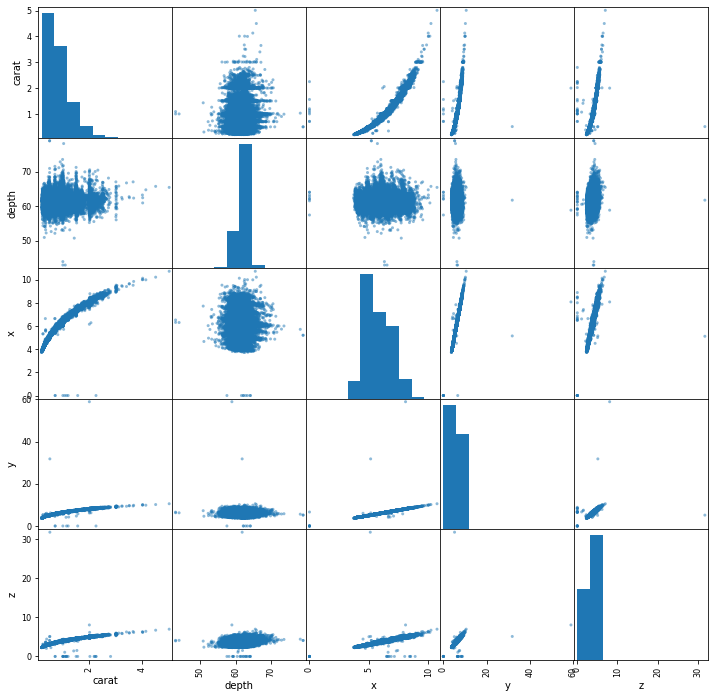

In [9]:
Numerical_attr = ["carat","depth","color","x","y","z"]
scatter_matrix(df1[Numerical_attr],figsize=(12,12))
# draw a matrix of scatter plots, with figure size of 12X12
plt.show()


Without the (x,y,z)

<ipython-input-21-1b4293898acb>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


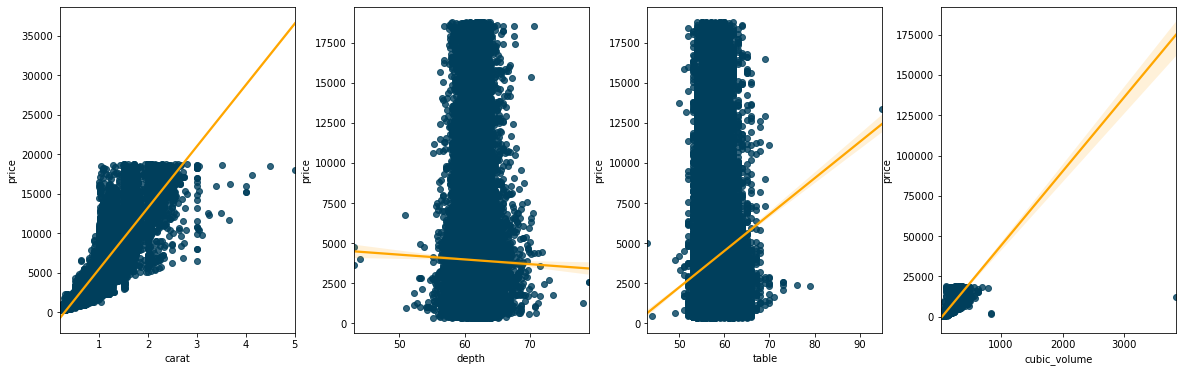

In [21]:
fig, ax =plt.subplots(1,4,figsize=(20,6))
# Create a figure and a subplots, with size of figure 20X6
fig.subplots_adjust( wspace=0.25)
j=0
for i in ['carat','depth','table','cubic_volume']:

 sns.regplot(data=df, x=i, y='price', color="#003f5c" , line_kws={'color':'#ffa600'}, ax=ax[j])
    # method to  plot data and a linear regression model fit.
 j=j+1
 
fig.show()  

<ipython-input-22-a546cb2dd91b>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


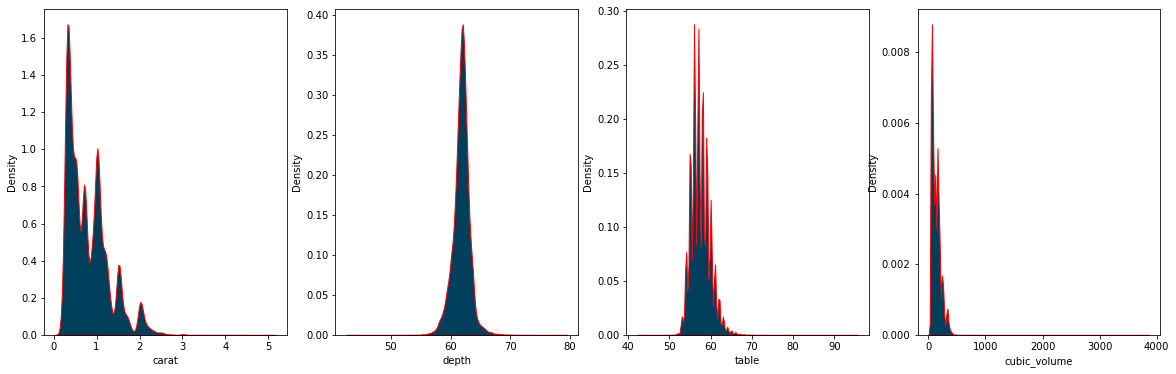

In [22]:
fig, ax =plt.subplots(1,4,figsize=(20,6))
# Create a figure and a subplots, with size of figure 20X6, n row is 1 an n column is 4
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
sns.kdeplot(data=df, x="carat", color="#003f5c", fill=True, edgecolor='red', alpha=1,ax=ax[0])
sns.kdeplot(data=df, x="depth", color="#003f5c", fill=True, edgecolor='red', alpha=1,ax=ax[1])
sns.kdeplot(data=df, x="table", color="#003f5c", fill=True, edgecolor='red', alpha=1,ax=ax[2])
sns.kdeplot(data=df, x="cubic_volume", color="#003f5c", fill=True, edgecolor='red', alpha=1,ax=ax[3])
fig.show()
# diaplay the figures

Text(0.5, 1.0, 'Correlation')

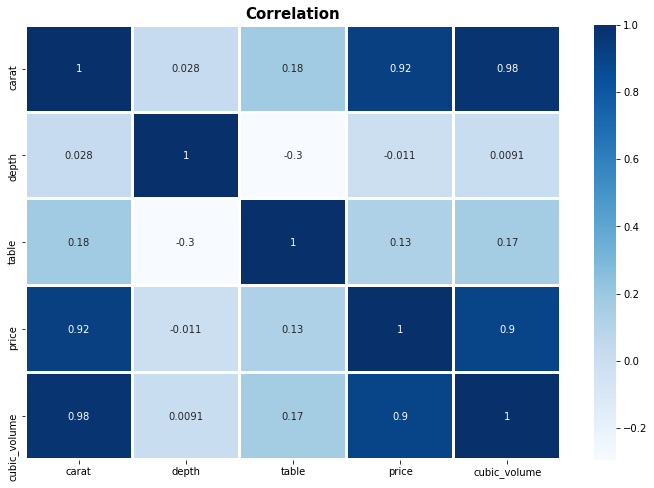

In [12]:
fig=plt.figure(figsize=(12,8))
#create a new figure, with size 12X8
sns.heatmap(df.corr(), linewidths=2, annot=True,cmap="Blues")
# heatmap is plot rectangular data as a color-encoded matrix.
# compute pairwise correlation of columns, excluding NA/null values.
# correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables
# positive correlation, negative correlation,neutral correlation  
plt.title("Correlation" , size=15, weight='bold')
# set title for figure

<ipython-input-9-793607cf067d>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


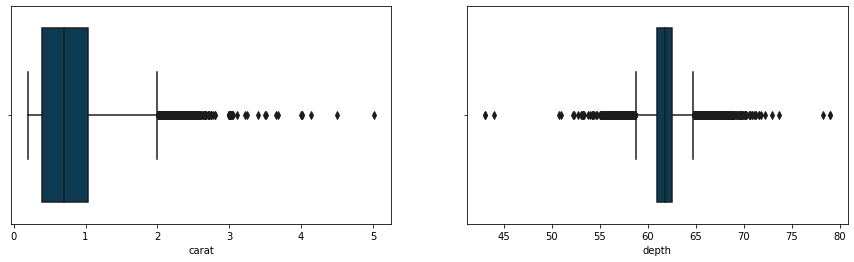

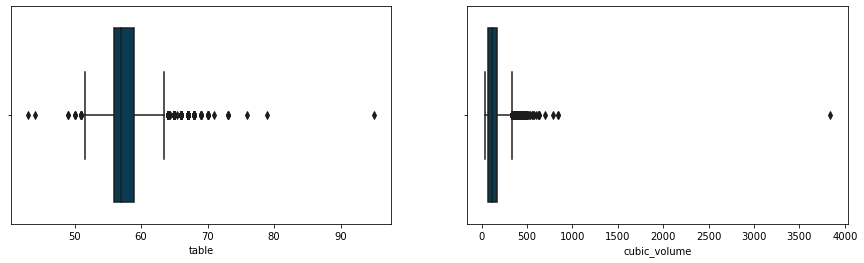

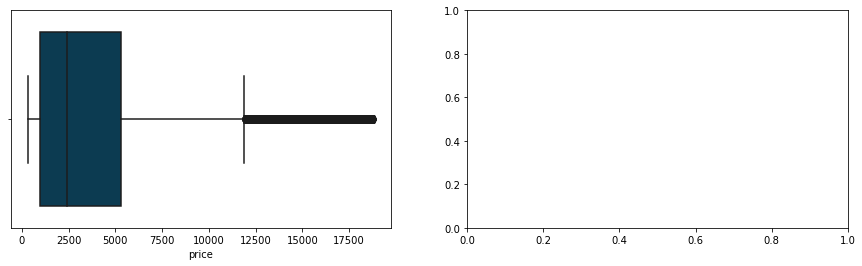

In [9]:
fig, ax =plt.subplots(1,2,figsize=(15,4))
# Create a figure and a subplots, with size of figure 15X4
sns.boxplot(data=df, x="carat", color="#003f5c" ,ax=ax[0])
# A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables
#or across levels of a categorical variable

sns.boxplot(data=df, x="depth", color="#003f5c",ax=ax[1])
fig, ax =plt.subplots(1,2,figsize=(15,4))
# Create a figure and a subplots, with size of figure 15X4, n row is 1 an n column is 2
sns.boxplot(data=df, x="table", color="#003f5c",ax=ax[0])
sns.boxplot(data=df, x="cubic_volume", color="#003f5c",ax=ax[1])
fig, ax =plt.subplots(1,2,figsize=(15,4))
sns.boxplot(data=df, x="price", color="#003f5c",ax=ax[0])
fig.show()

Data Without Outliers:

<ipython-input-24-552dacebd0c6>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


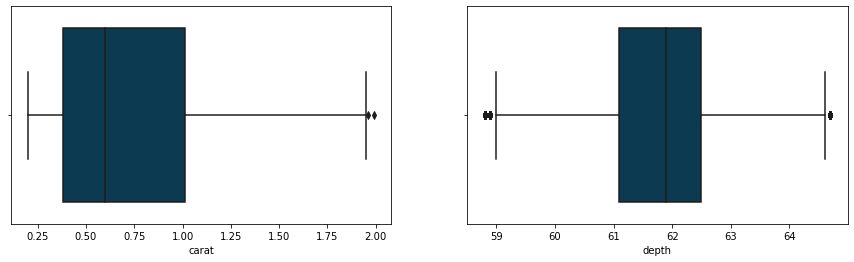

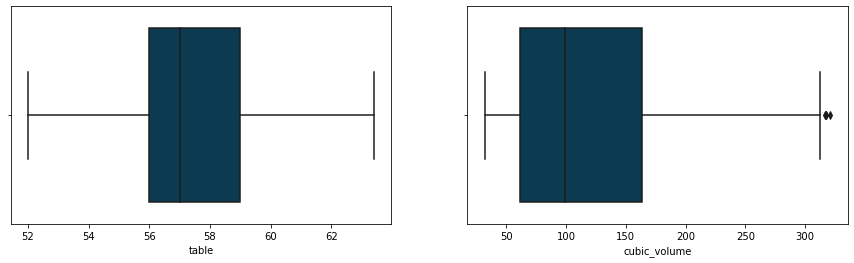

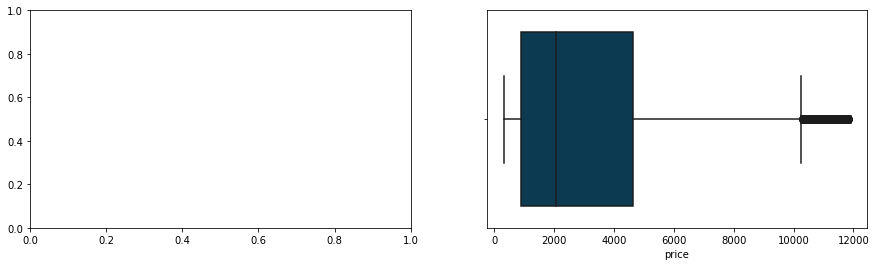

In [24]:
fig, ax =plt.subplots(1,2,figsize=(15,4))
sns.boxplot(data=df_without_outliers, x="carat", color="#003f5c" ,ax=ax[0])
sns.boxplot(data=df_without_outliers, x="depth", color="#003f5c",ax=ax[1])
fig, ax =plt.subplots(1,2,figsize=(15,4))
sns.boxplot(data=df_without_outliers, x="table", color="#003f5c",ax=ax[0])
sns.boxplot(data=df_without_outliers, x="cubic_volume", color="#003f5c",ax=ax[1])
fig, ax =plt.subplots(1,2,figsize=(15,4))
sns.boxplot(data=df_without_outliers, x="price", color="#003f5c",ax=ax[1])
fig.show()

<ipython-input-25-89f4a176acc6>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


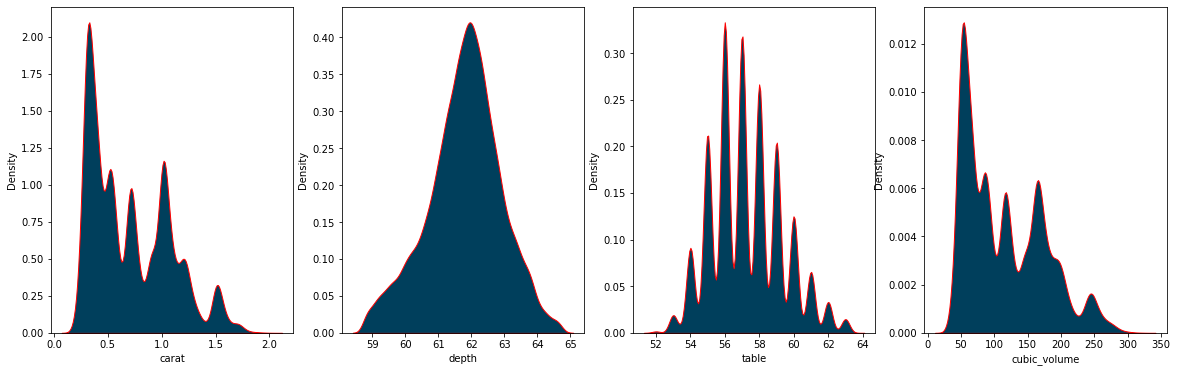

In [25]:
fig, ax =plt.subplots(1,4,figsize=(20,6))
# Create a figure and a subplots, with size of figure 20X6, n row is 1 an n column is 4
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
sns.kdeplot(data=df_without_outliers, x="carat", color="#003f5c", fill=True, edgecolor='red', alpha=1,ax=ax[0])
sns.kdeplot(data=df_without_outliers, x="depth", color="#003f5c", fill=True, edgecolor='red', alpha=1,ax=ax[1])
sns.kdeplot(data=df_without_outliers, x="table", color="#003f5c", fill=True, edgecolor='red', alpha=1,ax=ax[2])
sns.kdeplot(data=df_without_outliers, x="cubic_volume", color="#003f5c", fill=True, edgecolor='red', alpha=1,ax=ax[3])
fig.show()
# diaplay the figures

# Train and Test Sets:

In [12]:
train_set, test_set= train_test_split(final_df,test_size=0.2,random_state=1)
# split the data  into random train and test subsets randomly
diamonds_labels = train_set["price"].copy()
# creating data label
test_diamonds_labels= test_set["price"].copy()
diamonds = train_set.drop("price", axis=1)
# delete the price data, because we need the model to predict the price, so we need to delete this
diamonds_testset= test_set.drop("price", axis=1)

In [13]:
diamonds_labels = train_set["price"].copy()
# creating data label
test_diamonds_labels= test_set["price"].copy()
diamonds = train_set.drop("price", axis=1)
# delete the price data, because we need the model to predict the price, so we need to delete this
diamonds_testset= test_set.drop("price", axis=1)
diamonds_num = diamonds.drop(["cut", "color", "clarity"], axis = 1)
diamonds_num.head()
# display the first 5 rows for the object based on position.

,carat,depth,table,cubic_volume
46813,0.51,61.4,57.0,83.647728
23615,1.34,62.2,56.0,220.239360
6379,0.25,61.5,59.0,40.277184
42181,0.50,62.6,56.0,82.063080
18848,1.54,60.1,61.0,247.095342


# Color ordinal encoding:

In [14]:
diamond_color_ascending = ['J','I','H','G','F','E','D']
# color is an cateigoral data, so we need to encode this as numarical data
ordinal_encoder = OrdinalEncoder(categories=[diamond_color_ascending])
# OrdinalEncoder: encode categorical features as an integer array.
diamond_color_encoded = ordinal_encoder.fit_transform(diamonds[['color']])
# fit_transform joins two steps, (fit)calculates the parameters, (transform)apply the transformation to any particular 
diamond_color_encoded_df=pd.DataFrame(diamond_color_encoded)
# add to data frame color encode

ordinal_encoder = OrdinalEncoder(categories=[diamond_color_ascending])
test_diamond_color_encoded = ordinal_encoder.fit_transform(diamonds_testset[['color']])
test_diamond_color_ordinal_df=pd.DataFrame(test_diamond_color_encoded)
 
# this code for train set and test set

# Cuts ordinal encoding:

In [15]:
diamond_cuts_ascending = ['Fair','Good','Very Good','Premium','Ideal']
ordinal_encoder = OrdinalEncoder(categories=[diamond_cuts_ascending])
diamond_cut_encoded = ordinal_encoder.fit_transform(diamonds[['cut']])
diamond_cut_ordinal_df=pd.DataFrame(diamond_cut_encoded)
ordinal_encoder = OrdinalEncoder(categories=[diamond_cuts_ascending])
test_diamond_cut_encoded = ordinal_encoder.fit_transform(diamonds_testset[['cut']])
test_diamond_cut_ordinal_df=pd.DataFrame(test_diamond_cut_encoded)


#  Clarity ordinal encoding:

In [16]:
diamond_clarity_ascending = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
ordinal_encoder = OrdinalEncoder(categories=[diamond_clarity_ascending])
diamond_clarity_encoded = ordinal_encoder.fit_transform(train_set[['clarity']])
diamond_clarity_encoded_df=pd.DataFrame(diamond_clarity_encoded)
ordinal_encoder = OrdinalEncoder(categories=[diamond_clarity_ascending])
test_diamond_clarity_encoded = ordinal_encoder.fit_transform(diamonds_testset[['clarity']])
test_diamond_clarity_ordinal_df=pd.DataFrame(test_diamond_clarity_encoded)

a=diamond_color_encoded_df.join(diamond_cut_ordinal_df, rsuffix='1')
b=a.join(diamond_clarity_encoded_df)
b.rename(columns={0: '02'},inplace=True)
encoded_df = b
 
a_test=test_diamond_color_ordinal_df.join(test_diamond_cut_ordinal_df, rsuffix='1')
b_test=a.join(diamond_clarity_encoded_df)
b_test.rename(columns={0: '02'},inplace=True)
test_encoded_df = b_test
#encoded dataframe:

df[["clarity","color","cut"]].head(10)

,clarity,color,cut
0,SI2,E,Ideal
1,SI1,E,Premium
2,VS1,E,Good
3,VS2,I,Premium
4,SI2,J,Good
5,VVS2,J,Very Good
6,VVS1,I,Very Good
7,SI1,H,Very Good
8,VS2,E,Fair
9,VS1,H,Very Good


# Standardization:

In [17]:
numeric_coloumns = ["carat","cubic_volume","table","depth"]
pipeline = ColumnTransformer([
    ("num", StandardScaler(), numeric_coloumns,)
])
diamonds_scaled = pipeline.fit_transform(diamonds)
diamonds_scaled_df=pd.DataFrame(diamonds_scaled)
final_train_set=diamonds_scaled_df.join(encoded_df)

numeric_coloumns = ["carat","cubic_volume","table","depth"]
pipeline = ColumnTransformer([
    ("num", StandardScaler(), numeric_coloumns,)
])
test_diamonds_scaled = pipeline.fit_transform(diamonds_testset)
test_diamonds_scaled_df=pd.DataFrame(test_diamonds_scaled)
final_test_set=test_diamonds_scaled_df.join(test_encoded_df)
 
final_train_set.head(10)    

,0,1,2,3,0,01,02
0,-0.533947,-0.529772,-0.127456,-0.351336,6.0,4.0,3.0
1,1.715402,1.761852,-0.622903,0.373061,3.0,4.0,6.0
2,-1.238562,-1.257409,0.863438,-0.260786,5.0,3.0,5.0
3,-0.561048,-0.556358,-0.622903,0.735259,3.0,3.0,2.0
4,2.257414,2.212420,1.854333,-1.528480,1.0,3.0,1.0
5,0.848183,0.858291,0.367991,-1.437931,4.0,2.0,2.0
6,-0.561048,-0.590686,0.367991,2.546251,6.0,0.0,2.0
7,-0.832054,-0.829624,-0.622903,0.373061,2.0,4.0,1.0
8,0.116467,0.195555,-0.127456,-1.256832,2.0,4.0,2.0
9,-0.832054,-0.822605,-0.622903,0.191962,4.0,4.0,5.0


In [18]:
numeric_coloumns = ["carat","cubic_volume","table","depth"]
pipeline = ColumnTransformer([
    ("num", StandardScaler(), numeric_coloumns,)
])
test_diamonds_scaled = pipeline.fit_transform(diamonds_testset)
test_diamonds_scaled_df=pd.DataFrame(test_diamonds_scaled)
final_test_set=test_diamonds_scaled_df.join(test_encoded_df)
final_test_set.head()

,0,1,2,3,0,01,02
0,-1.052577,-1.055101,0.853383,-0.251291,6.0,4.0,3.0
1,0.835115,0.822280,0.853383,1.278670,3.0,4.0,6.0
2,-0.027830,0.028509,-0.624266,-0.161293,5.0,3.0,5.0
3,0.808148,0.724649,0.853383,0.198698,3.0,3.0,2.0
4,-0.836841,-0.849176,-1.116816,1.548664,1.0,3.0,1.0


#  Model Training:

In [33]:
modelridge = Ridge(alpha=0.5)
scores = cross_val_score(modelridge, final_train_set, diamonds_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
print("mean:",rmse_scores.mean())
print("std:",rmse_scores.std())



mean: 817.615538349068
std: 8.339212998050746


In [34]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_scores = cross_val_score(tree_reg, final_train_set,diamonds_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-tree_scores)
print("mean:",rmse_scores.mean())
print("std:",rmse_scores.std())

mean: 482.58953734702106
std: 21.732144772368294


In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(final_train_set, diamonds_labels)
pred=model.predict(final_train_set)
lin_mse = mean_squared_error(diamonds_labels, pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

817.3558339859368

In [39]:
regressor = SVR(kernel = 'linear')
linear_scores = cross_val_score(regressor, final_train_set, diamonds_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-linear_scores)
print("mean:",rmse_scores.mean())
print("std:",rmse_scores.std())

KeyboardInterrupt: 

In [147]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(final_train_set, diamonds_labels)


C:\Users\yazan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yazan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yazan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\yazan\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\yazan\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\yazan\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_features=4, n_estimators=30,
                                             random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
 print(np.sqrt(-mean_score), params)

479.35898992151044 {'max_features': 2, 'n_estimators': 3}
397.8329044517526 {'max_features': 2, 'n_estimators': 10}
379.89903468079734 {'max_features': 2, 'n_estimators': 30}
426.2504663039607 {'max_features': 4, 'n_estimators': 3}
379.3068748638522 {'max_features': 4, 'n_estimators': 10}
366.165521830789 {'max_features': 4, 'n_estimators': 30}
421.38373119142915 {'max_features': 6, 'n_estimators': 3}
380.8599762807572 {'max_features': 6, 'n_estimators': 10}
369.4198853256933 {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
449.1765106298619 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
395.26706690084785 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
420.6279621451892 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
384.21155655838254 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
420.24911085977413 {'bootstrap': Fal

In [21]:
forest_reg = RandomForestRegressor(random_state=42,max_features= 4, n_estimators= 30)
forst_scores = cross_val_score(forest_reg, final_train_set,diamonds_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-forst_scores)
print("mean:",rmse_scores.mean())
print("std:",rmse_scores.std())


mean: 361.1150684472875
std: 13.514041604637653


# Model Testing: 

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(final_train_set, diamonds_labels)
pred=model.predict(final_test_set)
lin_mse = mean_squared_error(test_diamonds_labels, pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1321.328240850859

In [34]:
forest_reg.fit(final_train_set, diamonds_labels)
a=forest_reg.predict(final_test_set)

In [35]:
dd = mean_squared_error(test_diamonds_labels, a)
cc = np.sqrt(dd)
cc

1458.1531342740714